# 项目目标
通过对解体思路的分析，我们就得到了帮助桐桐解决问题的步骤：

1. 分析网页，找到数据所在网页中的结构；
2. 向网页发送请求，获取网页代码；
3. 解析网页，提取职位名称、公司名称和所在城市；
4. 破解字体反爬虫，提取薪资；
5. 统计不同城市的平均薪资与职位数量；
6. 绘制柱状图，得出结论。

今天我们将一边学习，一边完成前两个步骤。后面将会学习剩下的步骤。

在这里，我们要获取的数据有：职位名称、公司名称、工作地址和工作薪资。

想要爬取数据，首先要去网页的 HTML 代码中找到所在的位置。在 Google Chrome 浏览器中复制粘贴下面👇的链接。

https://www.shixiseng.com/

在搜索栏内输入【产品经理】

# 分析网页

以第一个职位信息为例，在 HTML 代码中我们会发现，职位名称、公司名称和工作地址所在的节点中，class 的属性值中都有 ellipsis。

ellipsis 的意思是省略，也就是说在页面中展示的不是完整招聘信息，只是简化后的信息，方便用户迅速查看。

完整的信息在哪呢，我们可以点击【产品经理—校招】，会弹出一个新的页面，如右图所示，这里就包含了第一个招聘职位的所有信息。

Tips：由于网页结构会发生变化，你可以点击这个链接访问原网页结构。 http://nocturne.bczcdn.com/zip/1628650208218_90362/1.html     

在这里，各节点中的 class 属性值和标签内容有关，而不再是 ellipsis 省略了。

看来，我们不能从搜索页面中提取数据，需要在职位对应的页面中爬取数据，可是职位对应的 URL 链接在哪呢？

就在搜索页面每个职位名称中，这是一个超链接的格式，用户只要点击【职位名称】，就会跳转到另一个页面。

找到了数据在页面中的位置后，现在我们可以先在搜索页中提取职位名称所在的节点，再从节点中提取职位对应的URL链接。

注意，我们在这里要设置请求头，不然会被实习僧抓住哦┑(￣Д ￣)┍

# 思路整理
梳理好思路后，快去编写代码吧，在这里，我们可以使用桐桐电脑浏览器的 
```User-Agent。
User-Agent:
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36

URL链接：
https://www.shixiseng.com/interns?page=1&type=intern&keyword=
%E4%BA%A7%E5%93%81%E7%BB%8F%E7%90%86
&area=&months=&days=°ree=&official=entry&enterprise=&
salary=-0&publishTime=&sortType=&city=%E5%85%A8%E5%9B%BD
&internExtend=
```

<!doctype html>
<html data-n-head-ssr>
  <head >
    <title>产品经理实习_产品经理实习生招聘信息 – 实习僧</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width,initial-scale=1"><meta data-n-head="ssr" name="description" content="实习僧为大学生提供2022年最新的产品经理实习,产品经理实习生招聘信息。助力大学生职业发展,帮助企业有效招聘,找实习校招就上实习僧"><meta data-n-head="ssr" name="keywords" content="产品经理实习,产品经理实习生招聘,实习生招聘网,大学生实习,远程实习,留学生实习"><link data-n-head="ssr" rel="shortcut icon" href="//sxsimg.xiaoyuanzhao.com/static/img/favicon.ico" type="image/x-icon"><link data-n-head="ssr" href="//at.alicdn.com/t/font_1038259_tunwhkjekt8.css" rel="stylesheet"><link data-n-head="ssr" href="//at.alicdn.com/t/font_1431130_youmj9tm7qr.css" rel="stylesheet"><link data-n-head="ssr" href="https://sxsimg.xiaoyuanzhao.com/static_common/common-comp/common-comp.css" rel="stylesheet"><style data-n-head="ssr" type="text/css">@font-face {    font-family: myFont;    src: url(/interns/iconfonts/file?rand=0.616170868646442);}</
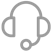
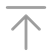

In [1]:
# TODO 导入requests模块
import requests

# TODO 将User-Agent以字典键对形式赋值给headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36"}

# 将职位排列第一页赋值给变量url
url = "https://www.shixiseng.com/interns?page=1&type=intern&keyword=%E4%BA%A7%E5%93%81%E7%BB%8F%E7%90%86&area=&months=&days=&degree=&official=entry&enterprise=&salary=-0&publishTime=&sortType=&city=%E5%85%A8%E5%9B%BD&internExtend="

# TODO 将url和headers参数，添加进requests.get()中，将字典headers传递给headers参数，给赋值给res
res = requests.get(url, headers = headers)

# TODO # 使用.text属性获取网页内容，赋值给html
html = res.text

# TODO 使用print输出html
print(html)

# 解析网页

获取到了网页的源代码，接下来我们需要使用 BeautifulSoup 模块解析源代码，提取出职位对应的 URL 链接所在的全部节点。

提取节点可以使用 find_all() 函数，将筛选条件作为参数传入，返回符合条件的节点列表。

需要注意：因为class 是Python 关键字 ，筛选时要在后面加一个下划线。

想要提取 HTML 代码中的节点，需要从 bs4 中导入 BeautifulSoup 模块。

使用 BeautifulSoup() 函数创建一个 BeautifulSoup 对象，传入变量 html 和解析器 lxml，赋值给 soup。

使用 find_all() 函数查询 soup 中所有含有 class="title ellipsis font" 的节点，将返回的列表赋值给 titles。

In [2]:
# 导入requests模块
import requests

# TODO 从bs4中导入BeautifulSoup模块
from bs4 import BeautifulSoup

# 将User-Agent以字典键对形式赋值给headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36"}

# 将职位排列第一页赋值给变量url
url = "https://www.shixiseng.com/interns?page=1&type=intern&keyword=%E4%BA%A7%E5%93%81%E7%BB%8F%E7%90%86&area=&months=&days=&degree=&official=entry&enterprise=&salary=-0&publishTime=&sortType=&city=%E5%85%A8%E5%9B%BD&internExtend="
    
# 将url和headers参数，添加进requests.get()中，将字典headers传递给headers参数，给赋值给res
res = requests.get(url, headers=headers)
    
# 使用.text属性获取网页内容，赋值给html
html = res.text

# TODO 用BeautifulSoup()传入变量html和解析器lxml，赋值给soup
soup = BeautifulSoup(html, "lxml")
    
# TODO 使用find_all()查询soup中class=title ellipsis font的节点，赋值给titles
titles = soup.find_all(class_ = "title ellipsis font")

# TODO 使用print输出titles
print(titles)

[<a class="title ellipsis font" data-v-98c756d6="" href="https://www.shixiseng.com/intern/inn_hqvzgspb0gjg?pcm=pc_SearchList" target="_blank" title="产品经理">产品经理</a>, <a class="title ellipsis font" data-v-98c756d6="" href="https://www.shixiseng.com/intern/inn_6yg8cvigz5bx?pcm=pc_SearchList" target="_blank" title="产品经理">产品经理</a>, <a class="title ellipsis font" data-v-98c756d6="" href="https://www.shixiseng.com/intern/inn_xrwfhryed1zb?pcm=pc_SearchList" target="_blank" title="产品经理">产品经理</a>, <a class="title ellipsis font" data-v-98c756d6="" href="https://www.shixiseng.com/intern/inn_6iv9rcqikfut?pcm=pc_SearchList" target="_blank" title="产品经理">产品经理</a>, <a class="title ellipsis font" data-v-98c756d6="" href="https://www.shixiseng.com/intern/inn_seuqeha0pzen?pcm=pc_SearchList" target="_blank" title="实习-产品经理">实习-产品经理</a>, <a class="title ellipsis font" data-v-98c756d6="" href="https://www.shixiseng.com/intern/inn_g7mw1w4llzet?pcm=pc_SearchList" target="_blank" title="业务类产品经理">业务类产品经理</a>, <a 

# 获取属性值

提取出符合条件的全部节点后，就要从中获取职位对应的 URL 链接。

在这里，职位对应的 URL 链接是 href 属性值，我们可以调用哪个属性获取 href 属性值呢。

.text属性可以获取网页内容；.content属性获取二进制数据；.encoding属性找出 requests模块使用了什么编码方式；.attrs属性可以获取属性值

提取职位对应的 URL 链接，首先需要使用 for 循环遍历列表 titles。

接着调用 .attrs 属性获取 href 对应的属性值，并赋值给变量 detail_url。

In [3]:
# 导入requests模块
import requests

# 从bs4中导入BeautifulSoup模块
from bs4 import BeautifulSoup

# 将User-Agent以字典键对形式赋值给headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36"}

# 将职位排列第一页赋值给变量url
url = "https://www.shixiseng.com/interns?page=1&type=intern&keyword=%E4%BA%A7%E5%93%81%E7%BB%8F%E7%90%86&area=&months=&days=&degree=&official=entry&enterprise=&salary=-0&publishTime=&sortType=&city=%E5%85%A8%E5%9B%BD&internExtend="
    
# 将url和headers参数，添加进requests.get()中，将字典headers传递给headers参数，给赋值给res
res = requests.get(url, headers=headers)
    
# 使用.text属性获取网页内容，赋值给html
html = res.text

# 用BeautifulSoup()传入变量html和解析器lxml，赋值给soup
soup = BeautifulSoup(html,"lxml")
    
# 使用find_all()查询soup中class=title ellipsis font的节点，赋值给titles
titles = soup.find_all(class_ = "title ellipsis font")

# TODO for循环遍历列表titles
for item in titles:

    # TODO 使用.attrs获取href对应的属性值，并赋值给detail_url
    detail_url = item.attrs["href"]

    # TODO 使用print输出detail_url
    print(detail_url)

https://www.shixiseng.com/intern/inn_hqvzgspb0gjg?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_6yg8cvigz5bx?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_xrwfhryed1zb?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_6iv9rcqikfut?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_seuqeha0pzen?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_g7mw1w4llzet?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_udc1mmlovuj5?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_u2ct8pwxuocj?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_h1bmfrwijyx5?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_8qjmmra3hcs2?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_abt7rkhvbiqs?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_k4oh7wavu0da?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_sldbwshlwkyi?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_hqedqmahhy9o?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_tes0wbycnad

# 获取多页信息

太好了，提取出了第一页页面中的职位对应的URL链接。

别忘了，我们要统计不同城市的平均薪资，数据量少了就不精准。

在这里我们可以获取前 100 个职位的数据，也就是前 5 页的信息。

我们已经获取到了单个页面中的数据， 那该如何批量获取多个页面的数据呢？

通过观察网页 URL 的变化规律，每次翻页 page= 参数值增加 1，其他的参数都没有发生改变。

所以，这里我们可以利用 for 循环生成不同页面的链接，然后再依次获取和解析对应页面的内容。

我们可以使用 for 循环遍历 range() 函数生成的 1-5 的数字。

接着，利用格式化字符串修改 page= 后面的参数生成网站链接。

然后将之前获取单个页面所有职位链接的代码，添加缩进放入循环内，就可以获取到前 5 个页面所有的职位链接啦。

In [4]:
# 导入requests模块
import requests

# 从bs4中导入BeautifulSoup模块
from bs4 import BeautifulSoup

# 将User-Agent以字典键对形式赋值给headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36"}

# TODO for循环遍历range()函数生成的1-5的数字
for i in range(1,6):

    # TODO 利用格式化字符生成串网站链接，赋值给变量url
    url = f"https://www.shixiseng.com/interns?page={i}&type=intern&keyword=%E4%BA%A7%E5%93%81%E7%BB%8F%E7%90%86&area=&months=&days=&degree=&official=entry&enterprise=&salary=-0&publishTime=&sortType=&city=%E5%85%A8%E5%9B%BD&internExtend="
    
    # 将url和headers参数，添加进requests.get()中，将字典headers传递给headers参数，给赋值给res
    res = requests.get(url, headers=headers)
    
    # 使用.text属性获取网页内容，赋值给html
    html = res.text

    # 用BeautifulSoup()传入变量html和解析器lxml，赋值给soup
    soup = BeautifulSoup(html,"lxml")
    
    # 使用find_all()查询soup中class=title ellipsis font的节点，赋值给titles
    titles = soup.find_all(class_ = "title ellipsis font")

    # for循环遍历列表titles
    for item in titles:

        # 使用.attrs获取href对应的属性值，并赋值给detail_url
        detail_url = item.attrs["href"]

        # 使用print输出detail_url
        print(detail_url)

https://www.shixiseng.com/intern/inn_hqvzgspb0gjg?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_6yg8cvigz5bx?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_xrwfhryed1zb?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_6iv9rcqikfut?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_seuqeha0pzen?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_g7mw1w4llzet?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_udc1mmlovuj5?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_u2ct8pwxuocj?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_h1bmfrwijyx5?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_8qjmmra3hcs2?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_abt7rkhvbiqs?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_k4oh7wavu0da?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_sldbwshlwkyi?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_hqedqmahhy9o?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_tes0wbycnad

虽然我们获取到 5 页 100 条职位对应的 URL 链接，但是这里存在风险，很可能被网站的反爬虫机制识别出，导致禁止访问该网站。

反爬虫的作用是什么呢，接下来我们来学习一下反爬虫。

# 反爬虫

随着网络的发展和网络爬虫技术的普及，为了收集某些需要的信息，大家会使用网络爬虫进行数据抓取。

但是一些爬虫程序会在短时间内发出大量请求，增加网站服务器的过重负担；甚至利用爬虫去盗窃核心数据，导致企业失去竞争力。

企业为了保护自身，就在网站里设置了反爬虫机制。

常见的反爬虫机制
在这里，给大家介绍最常遇到的两种反爬虫。

## 1. 基于 User-Agent 字段

User-Agent 是 HTTP 请求头中用来识别用户身份的一个字段。

每个正常用户使用浏览器正常访问网站时都会有标识自身属性的 User-Agent。而服务器如果发现 User-Agent 为空或不正常，则一般会拒绝返回数据，并返回错误码 403 表示禁止访问。

## 2. 基于用户行为

短时间内使用同一IP地址非常频繁的访问同一网站的不同页面，网站服务器发现后会对这个IP地址进行封禁。

简单来说，反爬虫是一种用于服务器来识别访问请求是否是正常用户请求的机制。

当服务器发现非正常用户的请求时，拒绝其访问服务器资源。

虽然网站有反爬虫机制，我们还是可以在合理范围内，运用些小方法绕过反爬虫，获取到想要的数据。

比如说，在程序中设置请求头中的 User-Agent，将爬虫程序伪装成浏览器的正常访问。

我们还可以设置每次访问的间隔时间，来规避短时间内频繁访问的问题。即抓取网页之后，停顿一段时间，再进行下一次抓取。

# 停顿函数

time.sleep() 函数的作用是让当前程序停顿一段时间。

time 模块是是 Python 的内置模块，要使用 time.sleep() 函数，需要先导入 time 模块。     

我们可以设置停顿的时间，时间单位是秒。

为了不被网站的反爬虫机制察觉到，我们需要在程序中设置爬虫停顿时间。

首先导入 time 模块，在每一次翻页前添加停顿时间，使用 time.sleep() 函数，将停顿时间设置为 2 秒。

小贴士：因为用了停顿函数，每页访问间会停顿2秒，所以整个代码的运行时间会超过10秒，请耐心等待～

In [5]:
# 导入requests模块
import requests

# 从bs4中导入BeautifulSoup模块
from bs4 import BeautifulSoup

# TODO 导入time模块
import time

# 将User-Agent以字典键对形式赋值给headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36"}

# for循环遍历range()函数生成的1-5的数字
for i in range(1,6):

    # 利用格式化字符生成串网站链接 赋值给变量url
    url = f"https://www.shixiseng.com/interns?page={i}&type=intern&keyword=%E4%BA%A7%E5%93%81%E7%BB%8F%E7%90%86&area=&months=&days=&degree=&official=entry&enterprise=&salary=-0&publishTime=&sortType=&city=%E5%85%A8%E5%9B%BD&internExtend="
    
    # 将url和headers参数，添加进requests.get()中，将字典headers传递给headers参数，给赋值给res
    res = requests.get(url, headers=headers)
    
    # 使用.text属性获取网页内容，赋值给html
    html = res.text

    # 用BeautifulSoup()传入变量html和解析器lxml，赋值给soup
    soup = BeautifulSoup(html,"lxml")
    
    # 使用find_all()查询soup中class=title ellipsis font的节点，赋值给titles
    titles = soup.find_all(class_ = "title ellipsis font")

    # for循环遍历列表titles
    for item in titles:

        # 使用.attrs获取href对应的属性值，并赋值给detail_url
        detail_url = item.attrs["href"]

        # 使用print输出detail_url
        print(detail_url)
    
    # TODO 使用time.sleep()停顿2秒
    time.sleep(2)

https://www.shixiseng.com/intern/inn_hqvzgspb0gjg?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_6yg8cvigz5bx?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_xrwfhryed1zb?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_6iv9rcqikfut?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_seuqeha0pzen?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_g7mw1w4llzet?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_udc1mmlovuj5?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_u2ct8pwxuocj?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_h1bmfrwijyx5?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_8qjmmra3hcs2?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_abt7rkhvbiqs?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_k4oh7wavu0da?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_sldbwshlwkyi?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_hqedqmahhy9o?pcm=pc_SearchList
https://www.shixiseng.com/intern/inn_tes0wbycnad

# 课程总结
在这节课中，我们分析了实习僧网页结构，理清了获取信息的思路。学习反爬虫和停顿函数，成功获取到了前 5 页 100 条职位 URL 链接。

下节课中，我们会去提取链接中的职位名称、公司名称和所在城市，还要破解字体反爬虫，拿到薪资╰(*°▽°*)╯

# 百题斩题目

## 图书榜单
小倩学习了今天的知识后，想要学以致用，利用Python爬取豆瓣图书网页，获取热门榜单的图书名字。

但是，她发现豆瓣图书的网页和豆瓣电影有所不同。

不同点1: 存储书名的节点没有class属性，所以我们只能先找到有class属性的div节点，即class="pl2"。再通过相关函数获取其a标签下的text文本信息。

不同点2: 获取的文本信息中，除了书名之外，还有空格(" ")和换行符("\n")，所以我们需要使用replace()函数去掉这些字符。

了解了两个网页的不同点之后，快来实现一下吧～

URL链接：https://book.douban.com/top250?start=0

User-Agent:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36

注意：本题需要用到.text知识点，请点击提示进行学习。

.text

如下图所示，我们可以看到包含“红楼梦”书名的节点没有统一的名称，所以我们不能直接使用find()函数。因此，我们需要先使用find_all()函数获取class="pl2"的节点，然后通过.a方法获取其中的a标签，再通过.text方法，获取a标签下的文本内容，就可以获得“红楼梦”的书名啦。

```
# 使用find()获取pl2节点
pl2 = content.find_all(class_="pl2")
# 使用.text获取pl2中a标签下的的text文本信息
title = pl2.a.text
```

In [6]:
# TODO 使用import导入requests模块
import requests

# TODO 从bs4中导入BeautifulSoup模块
from bs4 import BeautifulSoup

# TODO 将豆瓣电影评论URL地址，赋值给变量url
url = "https://book.douban.com/top250?start=0"

# TODO 将User-Agent以字典键对形式赋值给headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"}

# TODO 将 url 和 headers参数，添加进requests.get()中，将字典headers传递headers参数，给赋值给response
response = requests.get(url, headers = headers)

# TODO 将服务器响应内容转换为字符串形式，赋值给html
html = response.text

# TODO 使用BeautifulSoup()传入变量html和解析器lxml，赋值给soup
soup =BeautifulSoup(html, "lxml")

# TODO 使用find_all()查询soup中class="pl2"的节点，赋值给content_all
content_all = soup.find_all(class_ = "pl2")

# TODO for循环遍历content_all
for content in content_all:

    # TODO 使用.text方法获取content中a标签下的的text文本信息，赋值给title
    title = content.a.text

    # TODO 使用replace()去掉换行符
    title = title.replace("\n", "")

    # TODO 使用replace()去掉空格
    title = title.replace(" ", "")

    # TODO print书名
    print(title)

红楼梦
活着
百年孤独
飘
1984
三体全集:地球往事三部曲
白夜行
三国演义（全二册）
小王子
福尔摩斯探案全集（上中下）
动物农场
房思琪的初恋乐园
撒哈拉的故事
天龙八部
安徒生童话故事集
平凡的世界（全三部）
围城
追风筝的人
霍乱时期的爱情
局外人
沉默的大多数:王小波杂文随笔全编
明朝那些事儿（1-9）:限量版
月亮和六便士
人类简史:从动物到上帝
哈利·波特


## 新闻社兼职
桐桐在新闻社兼职期间，主要负责汇总新闻标题、点击量和网页链接。
网址：http://nocturne.bczcdn.com/zip/1628129171125_75703/m.html

要求获取该页所有新闻的标题、点击量和链接，并输出。

输出示例：
新闻标题 xxx     
点击量 xxx     
链接 xxx    

新闻标题 xxx      
点击量 xxx     
链接 xxx

注意：
1. 所有的新闻标题保存在class="tabContents active"所在的标签中；
2. 不是每个tr标签中都有新闻内容；
3. td标签中的class对应的属性值不同；

In [9]:
# 使用import导入requests模块
import requests
# 从bs4中导入BeautifulSoup模块
from bs4 import BeautifulSoup

# 将新闻URL地址，赋值给变量url
url = "http://nocturne.bczcdn.com/zip/1628129171125_75703/m.html"
# 将User-Agent以字典键对形式赋值给headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"}
# 将字典headers传递给headers参数
# 将 url 和 headers参数，添加进requests.get()中，赋值给response
response = requests.get(url, headers=headers)

# 使用.apparent_encoding属性获取网页编码方式
# 将网页编码方式赋值给response.encoding
response.encoding = response.apparent_encoding

# 将服务器响应内容转换为字符串形式，赋值给html
html = response.text
# 用BeautifulSoup()传入变量html和解析器lxml，赋值给soup
soup = BeautifulSoup(html, "lxml")

# TODO 使用find_all()查询soup中class=tabContents active的节点，赋值给content_all
content_all = soup.find_all(class_ = "tabContents active")

# TODO 使用for循环遍历content_all中的每项
for content in content_all:

    # TODO 使用find_all()查询content中name="tr"的节点，赋值给all_title
    all_title = content.find_all(name = "tr")

    # TODO 使用for循环遍历all_title中的每项
    for item in all_title:

        # TODO 使用find()查找item的a标签，判断为None时
        if item.find(name = "a") is None:
            # TODO 继续下次循环
            continue
            
        # TODO 使用find()查找item的a标签，并用.string找到a标签中的文本，赋值给title
        title = item.find(name = "a").string

        # TODO 使用find()查找item的a标签，并用.attrs获取a标签中href链接，赋值给title_url
        title_url = item.find(name = "a").attrs["href"]

        # TODO 使用find()函数查找class="cBlue"的节点，并使用.string获取节点中的文本，赋值给likes
        likes = item.find(class_ = "cBlue").string

        # TODO 使用print()以格式化的方式输出 新闻标题 xxx 
        print(f"新闻标题 {title}")
        # TODO 使用print()以格式化的方式输出 点击量 xxx 
        print(f"点击量 {likes}")
        # TODO 使用print()以格式化的方式输出 链接 xxx + 换行
        print(f"链接 {title_url}"+"\n")

新闻标题 湖南农村自建146平欧式小洋楼 车库变身超大卧室
点击量 85274
链接 https://home.163.com/20/1009/07/FOFRJKAD001081EI.html

新闻标题 14国对华持负面态度的民众数量达新高？中方回应
点击量 70829
链接 https://news.163.com/20/1009/21/FOHC38MG0001899O.html

新闻标题 90后艺术家瞒着父母改造家里 全屋贴满大尺度照片
点击量 62401
链接 https://home.163.com/20/1009/07/FOFRJLVH001081EI.html

新闻标题 “正如尊敬的特朗普所说…”，美军士兵扬言“遇到中
点击量 61879
链接 https://news.163.com/20/1010/02/FOHUPTUB0001899O.html

新闻标题 华南理工大学一教授疑涉性侵女学生，校方：查实其严
点击量 55209
链接 https://news.163.com/20/1009/23/FOHJPSLP0001899O.html

新闻标题 铜陵市政协副主席蒋叶贵持刀砍伤一女性 已被批捕
点击量 49839
链接 https://news.163.com/20/1010/02/FOHT1H6T0001899O.html

新闻标题 上海夫妻在1000平宅基地建白房子 1栋吃饭1栋
点击量 41343
链接 https://home.163.com/20/1010/07/FOIE0DT6001081EI.html

新闻标题 央视宣布复播NBA 今日直播总决赛湖人-热火G5
点击量 40668
链接 https://sports.163.com/20/1009/21/FOHD1QN90005877U.html

新闻标题 迅雷曝陈磊案细节：非法炒币，还与副总裁育有一子
点击量 38066
链接 https://tech.163.com/20/1009/11/FOG9E3RT000999LD.html

新闻标题 外国媒体人：不用再等世卫组织官宣了，中国已“击败
点击量 37123
链接 https://news.163.com/20/1009/00/FOF6L5160001899O.html

新闻标题 世预赛-梅西点射+制造1000球

## 岗位信息
临近求职季，为帮助大家找到合适的工作，在师范大学就读数学专业的小马，作为班上的班长需要每日汇总招聘信息推送给同学们。

数学类教育岗位网址为：
https://s.yingjiesheng.com/search.php?word=%E6%95%B0%E5%AD%A6&sort=score&start=0

利用之前学过的网页翻页知识，获取前3页的url地址，并找到含有职位名称的节点，输出职位名称，并在每次翻页时，使用time.sleep()函数停顿2秒。

注意：本题需要用到.text知识点。

In [ ]:
# 导入requests模块
import requests

# 从bs4中导入BeautifulSoup模块
from bs4 import BeautifulSoup

# TODO 导入time模块
import time

# 将User-Agent以字典键对形式赋值给headers
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36"}

# TODO for循环遍历range()函数生成的0-2的数字
for i in range(0, 3):

    # TODO 取遍历中的每个数和10相乘计算每页的数值，并赋值给page
    page = i * 10

    # TODO 用"https://s.yingjiesheng.com/search.php?word=%E6%95%B0%E5%AD%A6&sort=score&start="和page转换成的字符串格式相连，并赋值给url
    url = f"https://s.yingjiesheng.com/search.php?word=%E6%95%B0%E5%AD%A6&sort=score&start={page}"

    # TODO 将url和headers参数，添加进requests.get()中，将字典headers传递给headers参数，给赋值给res
    res = requests.get(url, headers = headers)

    # TODO 使用.text属性获取网页内容，赋值给html
    html = res.text

    # TODO 用BeautifulSoup()传入变量html和解析器lxml，赋值给soup
    soup = BeautifulSoup(html, "lxml")

    # TODO 使用find_all()查询soup中class=title的节点，赋值给content_all
    content_all = soup.find_all(class_ = "title")

    # TODO for循环遍历列表content_all
    for content in content_all:

        # TODO 使用.text获取每个节点中标签内的文本内容，赋值给title
        title = content.text

        # TODO 使用print输出title
        print(title)

    # TODO 使用time.sleep()停顿2秒
    time.sleep(2)

[哈尔滨]哈尔滨华德学院 数学教师
[郑州]华中师范大学附属郑州高新区万华城学校小学部 数学老师
[成都]西南交通大学数学学院 助理教授
[上海]上海立信会计金融学院统计与数学学院 骨干教师岗位
[西安]西南交通大学数学学院 特聘副研究员
[西安]西南交通大学数学学院 特聘研究员
[深圳]深圳市淘金山小学 小学语文教师|小学数学教师
中国科技出版传媒股份有限公司 科学出版社石家庄分公司招聘数学统计专业编辑
[重庆]重庆渝北区玉峰山中学 初中数学教师
[上海]同济大学数学流动站 博士后科研人员
[海南]海南省农垦实验中学 初中语文教师|初中物理教师|高中数学教师|高中物理教师
[广西]南宁市西乡塘区苏卢小学 语文|数学老师
[福建]龙文教育 高中数学老师
[福建]厦门市集美区双塔小学 英语顶岗教师|体育顶岗教师|数学顶岗教师
[北京]北京市八一学校 数学教师
[深圳]罗湖区清秀小学 体育|语文|数学老师
[福建]福州市金山实验小学 数学教师
贵阳市花溪区名仕教育培训学校有限公司 高中数学教师
[上海]上海国家应用数学中心 宣传秘书
[深圳]深圳大学数学与统计学院深圳应用数学中心 研究员
[深圳]才华学校 小学数学教师|信息老师|体育老师
[上海]上海理工大学 理学院沪江数学博士后
[浙江]杭州市文三教育集团文三街小学 小学数学教师
[广西]南宁市民族东小学 体育|数学顶岗教师
[广西]南宁市高新技术产业开发区民大小学 语文教师|数学教师|书法教师
[陕西]西北工业大学数学与统计学院 科研兼国际化秘书
[南宁]南宁市青秀区园湖路小学 数学教师|语文老师
[河北]宁晋县精英培优教育科技有限公司 代课教师
[广州]广东广州市天河区棠东小学 数学教师
[武汉]湖北商贸学院 数学教师
